# Fig 1.29 ERFs

Plotting the effective radiative forcings (ERFs) which appear in Fig 1.29

## Authors

All notebooks and plots in this repository were generated by the following authors:

- Zebedee Nicholls zebedee.nicholls@climate-energy-college.org
- Jared Lewis jared.lewis@climate-resource.com
- Malte Meinshausen malte.meinshausen@unimelb.edu.au

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [3]:
import os.path

import matplotlib.pyplot as plt
import numpy as np
import scmdata
from openscm_units import unit_registry

import utils

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
plt.rcParams["pdf.use14corefonts"] = True
plt.rcParams["text.usetex"] = False
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.size"] = 14

<IPython.core.display.Javascript object>

In [5]:
SOURCE_FILE = os.path.join(
    utils.DATA_DIR,
    "processed",
    "chrisroadmap-ar6",
    "clean_erf_timeseries.nc",
)
SOURCE_FILE

'/data2/ubuntu-znicholls/ar6-wg1-plots-and-processing/src/utils/../../data/processed/chrisroadmap-ar6/clean_erf_timeseries.nc'

<IPython.core.display.Javascript object>

In [6]:
db = scmdata.ScmRun.from_nc(SOURCE_FILE)
db

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg1-plots-and-processing/lib/python3.7/site-packages/xarray/coding/times.py:463: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/data/ubuntu-znicholls/miniconda3/envs/ar6-wg1-plots-and-processing/lib/python3.7/site-packages/numpy/core/_asarray.py:102: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


<ScmRun (timeseries: 160, timepoints: 751)>
Time:
	Start: 1750-01-01T00:00:00
	End: 2500-01-01T00:00:00
Meta:
	           model region scenario     unit  \
	0    unspecified  World   ssp119  W / m^2   
	1    unspecified  World   ssp119  W / m^2   
	2    unspecified  World   ssp119  W / m^2   
	3    unspecified  World   ssp119  W / m^2   
	4    unspecified  World   ssp119  W / m^2   
	..           ...    ...      ...      ...   
	155  unspecified  World   ssp585  W / m^2   
	156  unspecified  World   ssp585  W / m^2   
	157  unspecified  World   ssp585  W / m^2   
	158  unspecified  World   ssp585  W / m^2   
	159  unspecified  World   ssp585  W / m^2   
	
	                                          variable  
	0                      Effective Radiative Forcing  
	1        Effective Radiative Forcing|Anthropogenic  
	2    Effective Radiative Forcing|Anthropogenic|CH4  
	3    Effective Radiative Forcing|Anthropogenic|CO2  
	4    Effective Radiative Forcing|Anthropogenic|N2O  
	..         

<IPython.core.display.Javascript object>

In [7]:
# see Table 3 of Meinshausen et al. 2020
co2_pi = 277.15
co2_pi_units = co2_pi * unit_registry("ppm")
n2o_pi = 270.1 * unit_registry("ppb")

<IPython.core.display.Javascript object>

In [8]:
def co2_to_erf_helper(co2):

    # see Table 3 of Meinshausen et al. 2020
    a_1 = -2.4785 * 10 ** -7 * unit_registry("W / m ^ 2 / ppm ^ 2")
    b_1 = 0.00075906 * unit_registry("W / m ^ 2 / ppm")
    c_1 = -0.0021492 * unit_registry("W / m ^ 2 / ppb ^ 0.5")
    d_1 = 5.2488 * unit_registry("W / m ^ 2")

    c_alphamax = co2_pi_units - (b_1 / (2 * a_1))

    if co2 > c_alphamax:
        alpha_prime = d_1 - (b_1 ** 2 / (4 * a_1))
    else:
        alpha_prime = d_1 + a_1 * (co2 - co2_pi_units) ** 2 + b_1 * (co2 - co2_pi_units)

    alpha_n2o = c_1 * n2o_pi ** 0.5

    return (alpha_prime + alpha_n2o) * np.log(co2 / co2_pi_units)

<IPython.core.display.Javascript object>

In [9]:
co2_concs = np.arange(co2_pi, 5000, 1)
erfs = np.array(
    [
        co2_to_erf_helper(c * unit_registry("ppm")).to("W / m^2").magnitude
        for c in co2_concs
    ]
)
erfs[:3]

array([0.        , 0.01877991, 0.03749788])

<IPython.core.display.Javascript object>

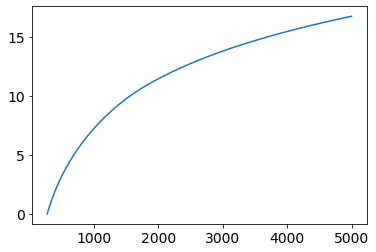

<IPython.core.display.Javascript object>

In [10]:
plt.plot(co2_concs, erfs)

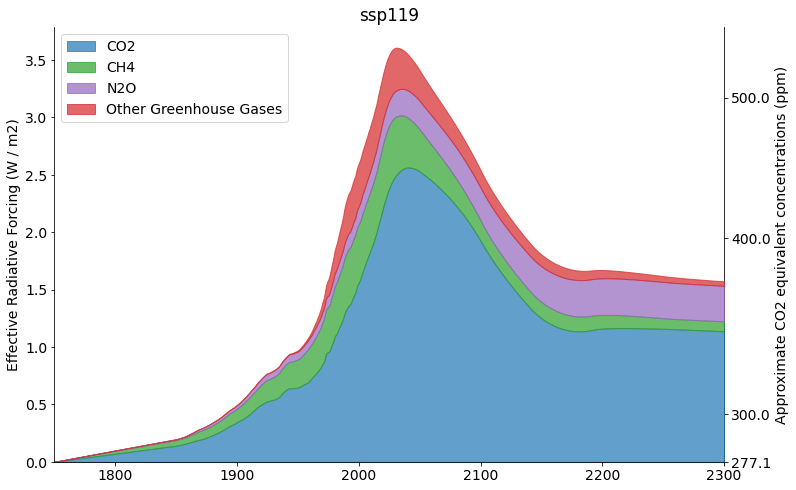

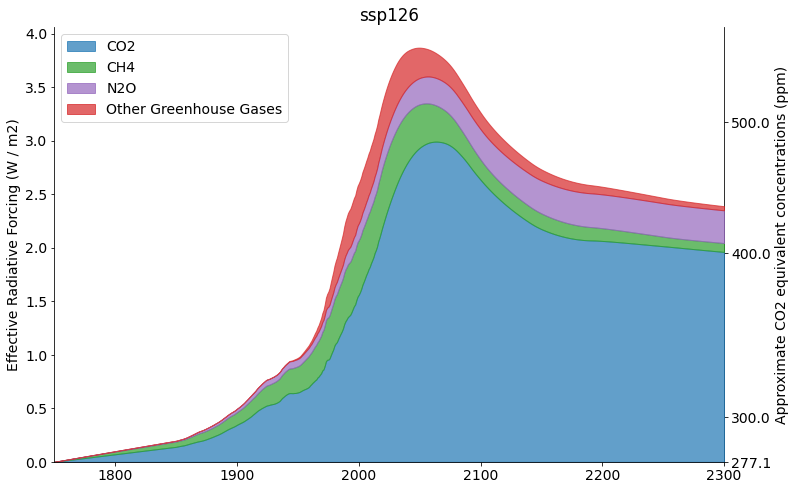

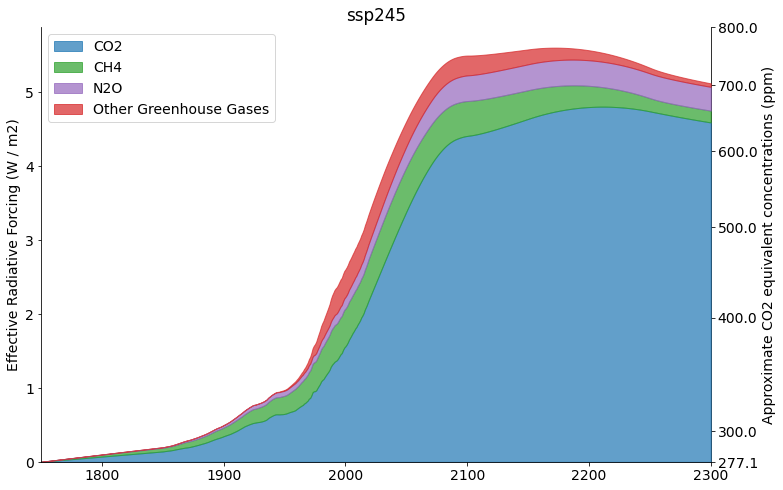

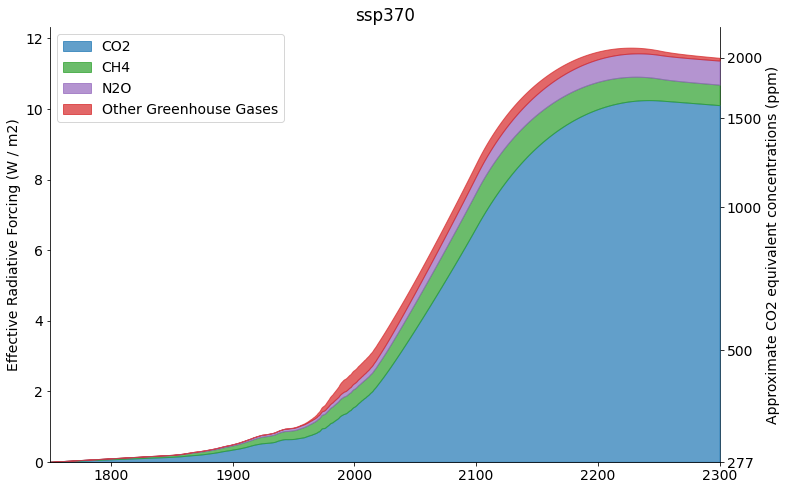

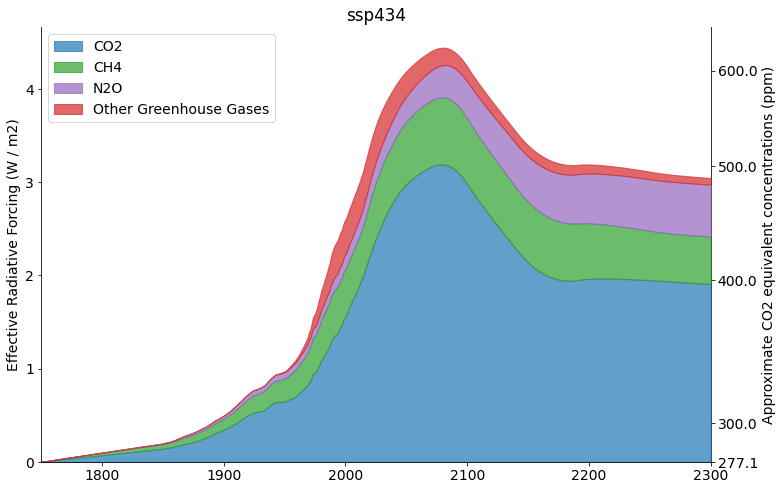

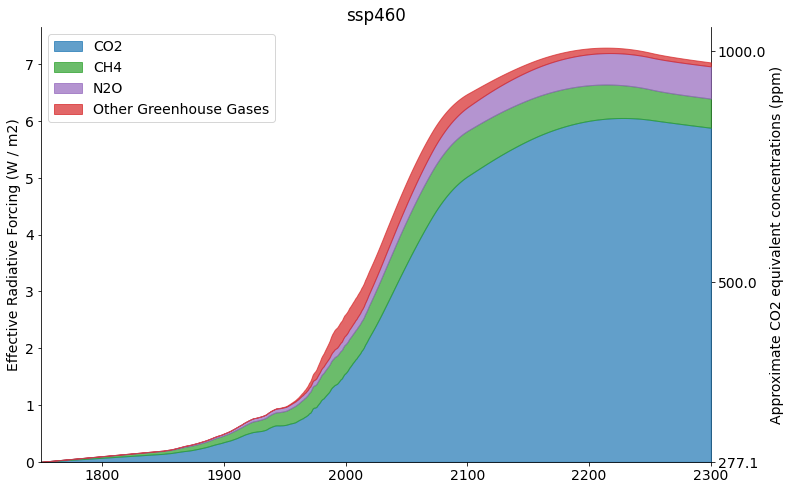

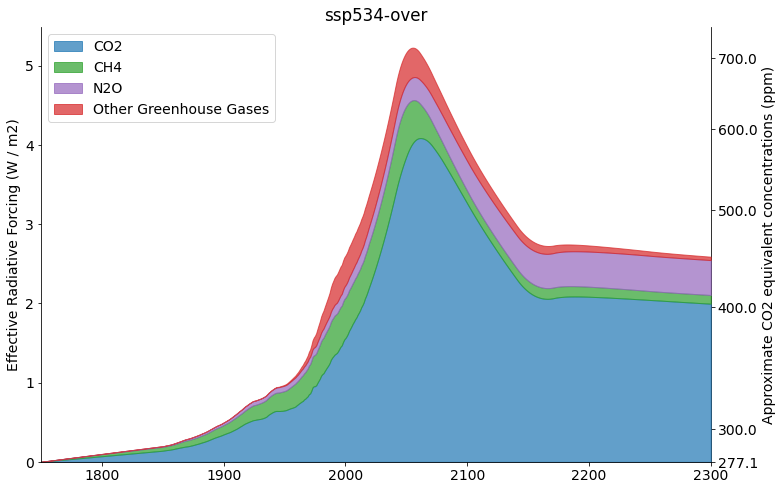

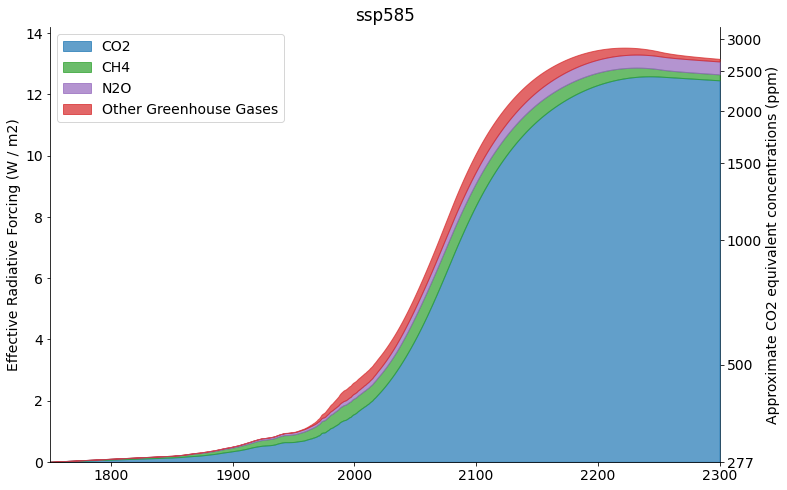

<IPython.core.display.Javascript object>

In [11]:
xmin = 1750
xmax = 2300

co2_colour = "tab:blue"
co2_alpha = 0.7
single_line_vars = (
    #     ("CH$_4$", "tab:blue"),
    #     ("N$_2$O", "tab:purple"),
    ("CH4", "tab:green"),
    ("N2O", "tab:purple"),
    ("Other Greenhouse Gases", "tab:red"),
)
single_line_var_alpha = 0.7

co2_pi = 277.1
f_2xco2 = 4.0


def erf_to_co2(f):
    if isinstance(f, np.ndarray):
        return np.array([co2_concs[np.argmin(np.abs(erfs - v))] for v in f])
    else:
        return co2_concs[np.argmin(np.abs(erfs - f))]


def co2_to_erf(co2):
    if isinstance(co2, np.ndarray):
        return np.array([erfs[np.argmin(np.abs(co2_concs - v))] for v in co2]).reshape(
            co2.shape
        )
    else:
        return erfs[np.argmin(np.abs(co2_concs - co2))]


for xmin in [
    1750,
    #     2015,
]:
    for sdf in db.filter(year=range(xmin, xmax + 1)).groupby("scenario"):
        scenario = sdf.get_unique_meta("scenario", True)
        if "low" in scenario:
            continue

        fig, ax = plt.subplots(figsize=(12, 8))
        x_axis = sdf["year"]

        co2_values = sdf.filter(
            variable="Effective Radiative Forcing|*CO2"
        ).values.squeeze()
        ax.fill_between(
            x_axis,
            np.zeros_like(x_axis),
            co2_values,
            color=co2_colour,
            alpha=co2_alpha,
            #         label="CO$_2$",
            label="CO2",
        )

        current_base = co2_values
        for var, colour in single_line_vars:
            var_values = sdf.filter(
                variable="Effective Radiative Forcing|*{}".format(
                    var.replace("$", "").replace("_", "")
                )
            ).values.squeeze()

            #         ax.plot(
            #             x_axis,
            #             current_base + var_values,
            #             label=var,
            #             color=colour,
            #             alpha=single_line_var_alpha,
            #         )

            ax.fill_between(
                x_axis,
                current_base,
                current_base + var_values,
                label=var,
                color=colour,
                alpha=single_line_var_alpha,
            )

            current_base += var_values

        ax.set_title(scenario)
        ax.set_xlim(xmin, xmax)
        ax.set_ylim(ymin=0)
        ax.set_ylabel("Effective Radiative Forcing (W / m2)")
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)

        secax = ax.secondary_yaxis(
            "right",
            functions=(
                erf_to_co2,
                co2_to_erf,
            ),
        )
        secax.set_ylabel("Approximate CO2 equivalent concentrations (ppm)")

        max_inv_conc = erf_to_co2(np.max(current_base))
        if max_inv_conc > 10 ** 3:
            yticks = [co2_pi] + list(
                np.arange(500, np.round(max_inv_conc, -3) + 1, 500)
            )
        else:
            yticks = [co2_pi] + list(
                np.arange(300, np.round(max_inv_conc, -2) + 1, 100)
            )

        secax.set_yticks(yticks)

        plt.legend(loc="upper left")
        #         plt.savefig(
        #             f"CO2DRIVER_ghg_erf_breakdown_{scenario}_{xmin}-{xmax}.pdf",
        #             transparent=True,
        #         )
        plt.show()